# K-means

In [ ]:
k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
clusters = np.arange(2, 20, 1)
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [ ]:
kmeans_list = []
for k in clusters:
    #model definition
    kmeans_model = c.KMeans( n_clusters=k)
    
    #model training
    kmeans_model.fit( Y)
    
    #model predict
    labels = kmeans_model.predict(Y)
    
    #model performance
    sil = m.silhouette_score( Y, labels, metric = 'euclidean')
    kmeans_list.append(sil)

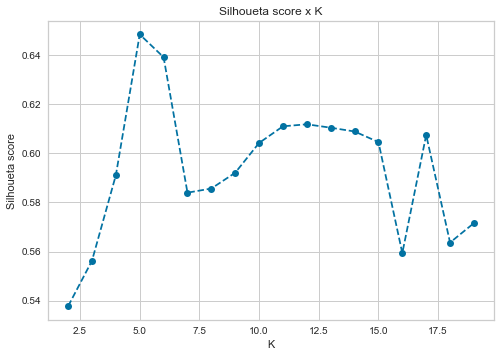

In [ ]:
plt.plot (clusters, kmeans_list, linestyle = '--', marker ='o', color= 'b')
plt.xlabel( 'K');
plt.ylabel( 'Silhoueta score');
plt.title( 'Silhoueta score x K');

# GMM

In [ ]:
from sklearn import mixture as mx

In [ ]:
gmm_list = []
for k in clusters:
# Model definition
    gmm_model = mx.GaussianMixture( n_components=k)

    # model training
    gmm_model.fit(Y)
    #model predict
    labels = gmm_model.predict(Y)
    # model performance
    sil = m.silhouette_score( Y, labels, metric = 'euclidean')
    gmm_list.append( sil)


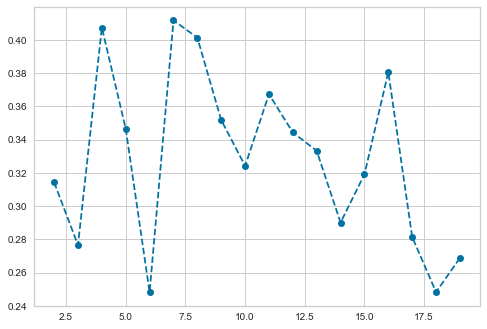

In [ ]:
plt.plot (clusters, gmm_list, linestyle = '--', marker ='o', color= 'b')

# Clustering hierarcico

In [ ]:
from scipy.cluster import hierarchy  as hc

In [ ]:
#model definition and trainig
hc_model = hc.linkage(Y,'ward'  )

[]

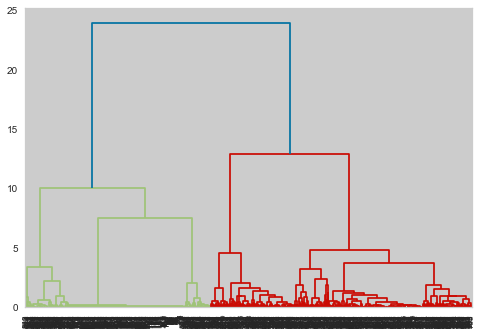

In [ ]:
hc.dendrogram(
    hc_model,
    leaf_rotation=90,
    leaf_font_size=8
)
plt.plot()

[]

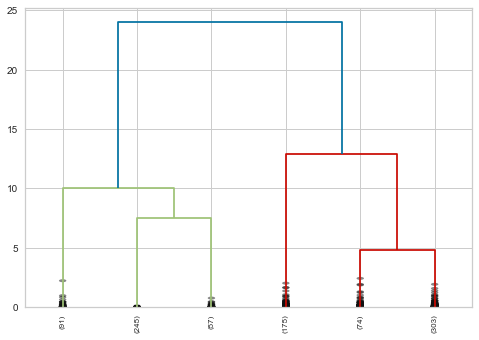

In [ ]:
hc.dendrogram(
    hc_model,
    truncate_mode='lastp',
    p=6,
    leaf_rotation=90,
    leaf_font_size=8,
    show_contracted=True
)
plt.plot()

## Siloueta cluster hierarquico

In [ ]:
hc_list = []
for k in clusters:
    # Model definition
    hc_model = hc.linkage(Y,'ward'  )

    #model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')

    #metrics
    sil = m.silhouette_score(Y,labels, metric='euclidean')
    hc_list.append(sil)


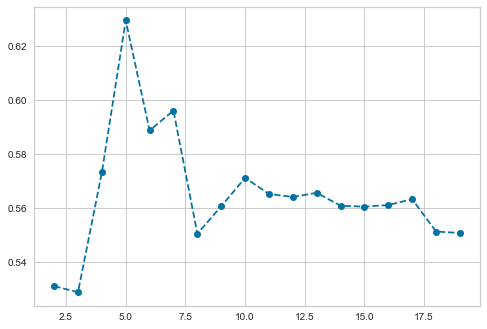

In [ ]:
plt.plot (clusters, hc_list, linestyle = '--', marker ='o', color= 'b')

# DBSCAN

In [ ]:
eps = 0.38
min_samples=20

#model definiition
dbscan_model = c.DBSCAN( eps=eps, min_samples=min_samples)

#mode trainig e predici
labels = dbscan_model.fit_predict(Y)

sil = m.silhouette_score(Y,labels, metric='euclidean')
sil

0.18041849522305023

In [ ]:
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[ -1  18]
 [  0 927]]


In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
neighors = NearestNeighbors(n_neighbors=min_samples).fit(Y)
distances, indices = neighors.kneighbors(Y)

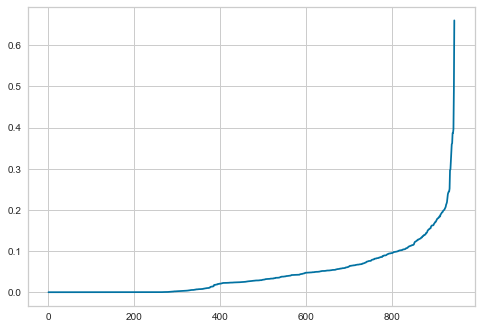

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
dbscan_list = [ 0.00000, 0.00000,0.00000, 0.516519, 0.00000,0.00000, 0.00000,0.00000] 

# Results

In [ ]:
df_results = pd.DataFrame({
    'KMeans': kmeans_list,
    'GMM': gmm_list,
    'HC': hc_list,
    #'DBSCAN': dbscan_list
}).T

df_results.columns = clusters

In [ ]:
df_results.style.highlight_max(color='lightgreen', axis=0)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
KMeans,0.537712,0.556245,0.591097,0.648471,0.639174,0.583975,0.585672,0.592105,0.604239,0.611023,0.611847,0.610455,0.608911,0.604608,0.559346,0.607484,0.563653,0.571574
GMM,0.314260,0.276496,0.407382,0.346485,0.248139,0.411740,0.401367,0.351763,0.324194,0.367314,0.344321,0.333238,0.290045,0.319097,0.380655,0.281387,0.248169,0.268772
HC,0.531169,0.528913,0.573194,0.629432,0.588730,0.596064,0.550545,0.560697,0.571191,0.565257,0.564138,0.565671,0.560900,0.560544,0.561161,0.563309,0.551353,0.550815
